In [1]:
#Loading the Libraries
import numpy as np 
import os
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob

 
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
 
for dirname, _, filenames in os.walk('C:\\Users\\samue\\Downloads\\Green deck image classification (1)'):
    for filename in filenames:
        print(os.path.join('../input/green-deck-image-classification/fashion/fashion', 'train.csv'))

In [2]:
#Loading the dataset
os.listdir('../input/green-deck-image-classification/fashion')
import glob
Image_list=glob.glob('../input/green-deck-image-classification/fashion/*.jpg',recursive=True)



In [3]:
dataset = pd.read_csv('../input/green-deck-image-classification/train.csv')


**Performing Exploratory Data Analysis (EDA):**


In [4]:
len(dataset)

6000

In [5]:
dataset[0:5]

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [6]:
dataset.head()

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [7]:
dataset.tail()

,files,target,images
5995,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5db865b0d5424ee1f33537b6_2.jpg
5996,../input/fashiondata/data/bags/5db81154d5424ee...,bags,5db81154d5424ee1f3352f9c_2.jpg
5997,../input/fashiondata/data/bags/5da81d547861c2a...,bags,5da81d547861c2af6a5a8e7d_2.jpg
5998,../input/fashiondata/data/beauty/5da81b44b25b0...,beauty,5da81b44b25b035d1d17a692_6.jpg
5999,../input/fashiondata/data/bags/5db81225d5424ee...,bags,5db81225d5424ee1f335361f_0.jpg


In [8]:
dataset.shape

(6000, 3)

In [9]:
dataset.describe()

,files,target,images
count,6000,6000,6000
unique,6000,4,6000
top,../input/fashiondata/data/shoes/5da81ceb7861c2...,beauty,5da81ceb7861c2af6a5a89a7_1.jpg
freq,1,1524,1


In [10]:
dataset.nunique()

files     6000
target       4
images    6000
dtype: int64

In [11]:
dataset['target'].unique()

array(['shoes', 'beauty', 'jewelry and watches', 'bags'], dtype=object)

In [12]:
len(dataset['target'].unique())

4

In [13]:
dataset['target'].value_counts()


beauty                 1524
bags                   1508
jewelry and watches    1503
shoes                  1465
Name: target, dtype: int64

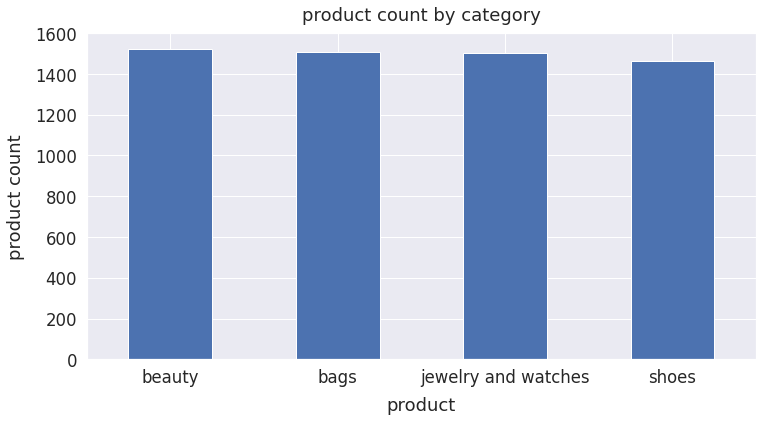

In [14]:
sns.set(font_scale=1.5)
dataset['target'].value_counts().plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel("product", labelpad=10)
plt.ylabel("product count", labelpad=10)
plt.title("product count by category", y=1.02);

In [15]:
####resize images
IMAGE_SIZE = [224,224]

In [16]:
##Image Preprocessing##
def preprocess(im):
    im=load_img(i,target_size=(224,224))
    im=img_to_array(im)
    im=np.expand_dims(im,axis=0)
    im=preprocess_input(im)
    return im[0]

In [17]:
images = np.array(Image_list)
images

array([], dtype=float64)

In [18]:
data = os.listdir("../input/green-deck-image-classification/fashion/fashion")

In [19]:
from sklearn.model_selection import train_test_split
train = df = pd.read_csv('../input/green-deck-image-classification/train.csv')
train, test = train_test_split(df, test_size=0.2, random_state=25)

In [20]:
##Defining the Pre-Trained Model##
vgg =VGG19(include_top=False,pooling='avg',input_shape=(224,224,3))

2022-07-05 06:38:25.718586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 06:38:25.909302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 06:38:25.910157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 06:38:25.911290: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step


In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
x = Flatten()(vgg.output)

In [23]:
prediction = Dense(len(dataset['target'].unique()), activation = 'softmax') (x)

In [24]:
model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [27]:
train_generator= datagen.flow_from_dataframe(
dataframe=train,
directory="../input/green-deck-image-classification/fashion/fashion",
x_col="images",
y_col="target",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

valid_generator= datagen.flow_from_dataframe(
dataframe=train,
directory="../input/green-deck-image-classification/fashion/fashion",
x_col="images",
y_col="target",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="../input/green-deck-image-classification/fashion/fashion",
x_col="images",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

Found 3600 validated image filenames belonging to 4 classes.
Found 1200 validated image filenames belonging to 4 classes.
Found 1200 validated image filenames.


In [28]:
##Compiling the model##
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

In [29]:
##Fitting the Model##
r = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=20,
    validation_data=valid_generator, validation_steps=valid_generator.samples//valid_generator.batch_size,
    verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-07-05 06:38:39.521729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-07-05 06:38:41.899540: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


112/112 [==============================] - 39s 271ms/step - loss: 1.3897 - accuracy: 0.3974 - val_loss: 1.0523 - val_accuracy: 0.5397
Epoch 2/20
112/112 [==============================] - 14s 125ms/step - loss: 1.0674 - accuracy: 0.5216 - val_loss: 0.9863 - val_accuracy: 0.5625
Epoch 3/20
112/112 [==============================] - 15s 130ms/step - loss: 0.9092 - accuracy: 0.6270 - val_loss: 0.7867 - val_accuracy: 0.7154
Epoch 4/20
112/112 [==============================] - 14s 126ms/step - loss: 0.8338 - accuracy: 0.6903 - val_loss: 1.0423 - val_accuracy: 0.5481
Epoch 5/20
112/112 [==============================] - 14s 125ms/step - loss: 0.7771 - accuracy: 0.7158 - val_loss: 0.7632 - val_accuracy: 0.7449
Epoch 6/20
112/112 [==============================] - 15s 130ms/step - loss: 0.7199 - accuracy: 0.7601 - val_loss: 0.7878 - val_accuracy: 0.7179
Epoch 7/20
112/112 [==============================] - 14s 127ms/step - loss: 0.6848 - accuracy: 0.7741 - val_loss: 0.7477 - val_accuracy: 0.7

**Plotting the loss graph for train and val sets**

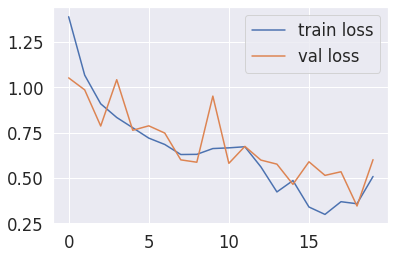

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

**Plotting the accuracy graph for train and val sets**

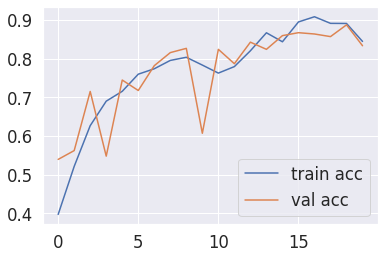

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
import tensorflow as tf

from keras.models import load_model

model.save('greendeck_new_model.h5')